<a href="https://colab.research.google.com/github/AjayKumarGogineni777/covid_cnn/blob/main/Covid_classification_ResNet_DenseNet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline
from google.colab import drive
drive.mount('/content/gdrive')
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

def fxn():
    warnings.warn("deprecated", DeprecationWarning)

with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    fxn()

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
# path_img = '/content/gdrive/My Drive/Sage Health/X ray/classification/'
path_img = '/content/gdrive/My Drive/Sage Health/X ray/new_images/'
import os
os.listdir(path_img)

['train', 'test', 'valid', 'models_old', 'models']

In [ ]:
from fastai.vision import *
from fastai.metrics import error_rate
il = ImageList.from_folder(path_img, convert_mode='L')
il[:5]

ImageList (5 items)
Image (1, 891, 880),Image (1, 876, 882),Image (1, 888, 882),Image (1, 874, 880),Image (1, 1148, 2563)
Path: /content/gdrive/My Drive/Sage Health/X ray/new_images

In [ ]:
# il.items[0]

In [ ]:
bs = 1
defaults.cmap='binary'
fnames = get_image_files(path_img)

In [ ]:
## size = 420 for densenet
## size = 720 for resnet

In [ ]:
data = ImageDataBunch.from_folder(path_img,size = 420,ds_tfms=get_transforms(), test = 'test', num_workers=4, bs = 16).normalize(imagenet_stats)

In [ ]:
data.train_ds

LabelList (1717 items)
x: ImageList
Image (3, 420, 420),Image (3, 420, 420),Image (3, 420, 420),Image (3, 420, 420),Image (3, 420, 420)
y: CategoryList
covid,covid,covid,covid,covid
Path: /content/gdrive/My Drive/Sage Health/X ray/new_images

In [ ]:
data.valid_ds

LabelList (371 items)
x: ImageList
Image (3, 420, 420),Image (3, 420, 420),Image (3, 420, 420),Image (3, 420, 420),Image (3, 420, 420)
y: CategoryList
normal,normal,normal,normal,normal
Path: /content/gdrive/My Drive/Sage Health/X ray/new_images

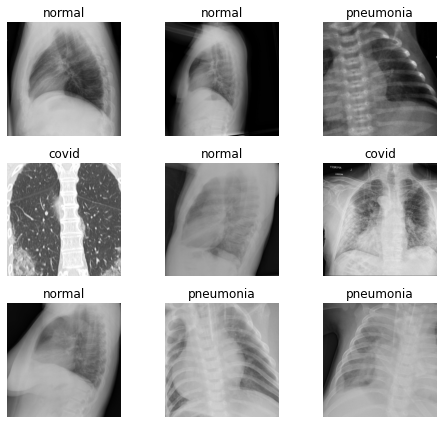

In [ ]:
data.show_batch(rows=3, figsize=(7,6))

In [ ]:
print(data.classes)
len(data.classes),data.c

['covid', 'normal', 'pneumonia']


(3, 3)

In [ ]:
data.test_ds

LabelList (372 items)
x: ImageList
Image (3, 420, 420),Image (3, 420, 420),Image (3, 420, 420),Image (3, 420, 420),Image (3, 420, 420)
y: EmptyLabelList
,,,,
Path: /content/gdrive/My Drive/Sage Health/X ray/new_images

In [ ]:
path_models = path_img + 'models/'

In [ ]:
from torch import nn
import torch.nn.functional as F

class FocalLoss(nn.Module):
    def __init__(self, alpha=1, gamma=2, logits=False, reduction='elementwise_mean'):
        super(FocalLoss, self).__init__()
        self.alpha = alpha
        self.gamma = gamma
        self.logits = logits
        self.reduction = reduction

    def forward(self, inputs, targets):
        if self.logits:
            BCE_loss = F.binary_cross_entropy_with_logits(inputs, targets, reduction='none')
        else:
            BCE_loss = F.binary_cross_entropy(inputs, targets, reduction='none')
        pt = torch.exp(-BCE_loss)
        F_loss = self.alpha * (1-pt)**self.gamma * BCE_loss

        if self.reduction is None:
            return F_loss
        else:
            return torch.mean(F_loss)

In [ ]:
## Resnet34

In [ ]:
learn = cnn_learner(data, models.resnet34, metrics=error_rate)

learn.loss_fn = FocalLoss()

epoch,train_loss,valid_loss,error_rate,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


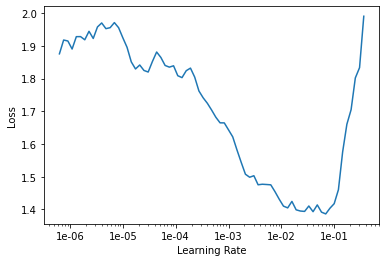

In [ ]:
learn.lr_find()
learn.recorder.plot()

In [ ]:
learn.fit_one_cycle(4, max_lr = 3e-3)

epoch,train_loss,valid_loss,error_rate,time
0,0.732706,0.665529,0.177898,04:24
1,0.542843,0.263848,0.113208,03:42
2,0.353799,0.175175,0.070081,03:40
3,0.272039,0.146054,0.051213,03:43


In [ ]:
learn.save(path_models + 'epoch-4-1e-3-resnet34-focal')

In [ ]:
learn.fit_one_cycle(10, max_lr=slice(1e-4, 3e-3))

epoch,train_loss,valid_loss,error_rate,time
0,0.287614,0.156713,0.064690,03:43
1,0.304781,0.167636,0.048518,03:42
2,0.295247,0.189088,0.059299,03:41
3,0.309428,0.245031,0.080863,03:42
4,0.265886,0.184578,0.086253,03:44
5,0.241589,0.170988,0.061995,03:46
6,0.252747,0.159554,0.040431,03:44
7,0.203318,0.155175,0.053908,03:41
8,0.187350,0.149944,0.045822,03:47
9,0.154397,0.139458,0.045822,03:48


In [ ]:
learn.save(path_models + 'epoch-14-1e-3-resnet34-focal')

In [ ]:
learn.load(path_models + 'epoch-14-1e-3-resnet34-focal');

In [ ]:
learn.fit_one_cycle(6, max_lr=slice(1e-4, 8e-4))

epoch,train_loss,valid_loss,error_rate,time
0,0.155761,0.148603,0.053908,03:49
1,0.150869,0.141067,0.045822,03:51
2,0.181105,0.156389,0.048518,03:49
3,0.147500,0.179055,0.061995,03:53
4,0.124148,0.153624,0.035040,03:50
5,0.140767,0.156438,0.043127,03:51


In [ ]:
learn.save(path_models + 'epoch-20-8e-4-resnet34-focal')

In [ ]:
learn.fit_one_cycle(6, max_lr=slice(1e-4, 5e-4))

epoch,train_loss,valid_loss,error_rate,time
0,0.162743,0.171531,0.059299,03:50
1,0.160360,0.159545,0.059299,03:51
2,0.152168,0.167426,0.048518,03:51
3,0.135692,0.152609,0.035040,03:50
4,0.127029,0.170384,0.053908,03:51
5,0.141733,0.153959,0.035040,03:52


In [ ]:
learn.save(path_models + 'epoch-26-2e-2-resnet34-focal')

In [ ]:
#learn.load(path_models + 'epoch-20-2e-3-resnet34');

In [ ]:
predictions, y1 = learn.get_preds(DatasetType.Test)
preds = np.argmax(predictions, axis = 1)
preds, len(preds)

(tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 2, 2, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 2, 0, 2, 0, 0, 0, 0, 0, 0,
         1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
         1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
         1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
         1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
         1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
         1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
         1, 1, 1, 1, 1, 1, 2, 0, 0, 2, 0, 2, 2, 0, 0, 2, 2, 0, 0, 0, 0, 0, 0, 0,
         2, 2, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
         2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
         2, 2, 2, 2, 2, 2, 2

In [ ]:
t1 = [0 for i in range(72)]
t2 = [1 for i in range(150)]
t3 = [2 for i in range(150)]
arr = t1+t2+t3
arr = np.asarray(arr)
len(arr)

372

In [ ]:
import torch
target = torch.from_numpy(arr)
target

tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,

In [ ]:
## 26 epochs
from sklearn.metrics import classification_report, confusion_matrix

cm = confusion_matrix(target, preds)
print(classification_report(target, preds))
cm

              precision    recall  f1-score   support

           0       0.80      0.92      0.86        72
           1       0.99      1.00      1.00       150
           2       0.96      0.89      0.93       150

    accuracy                           0.94       372
   macro avg       0.92      0.94      0.93       372
weighted avg       0.95      0.94      0.94       372



array([[ 66,   1,   5],
       [  0, 150,   0],
       [ 16,   0, 134]])

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

cm = confusion_matrix(target, preds)
print(classification_report(target, preds))

              precision    recall  f1-score   support

           0       0.79      0.94      0.86        72
           1       1.00      1.00      1.00       150
           2       0.97      0.88      0.92       150

    accuracy                           0.94       372
   macro avg       0.92      0.94      0.93       372
weighted avg       0.95      0.94      0.94       372



In [ ]:
cm## 20 epochs

array([[ 68,   0,   4],
       [  0, 150,   0],
       [ 18,   0, 132]])

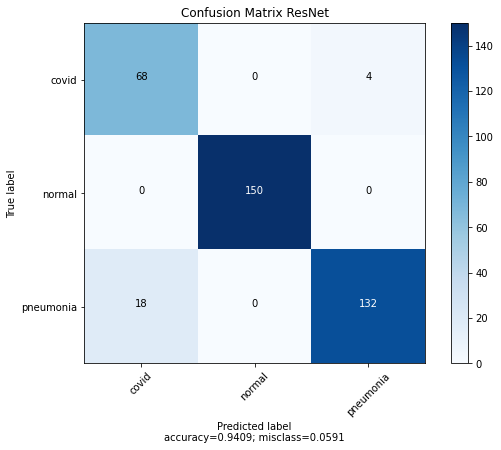

In [ ]:
import numpy as np
cm = np.array([[ 68,   0,   4],
       [  0, 150,   0],
       [ 18,   0, 132]])
import numpy as np


def plot_confusion_matrix(cm,
                          target_names,
                          title='Confusion matrix',
                          cmap=None,
                          normalize=True):
    """
    given a sklearn confusion matrix (cm), make a nice plot

    Arguments
    ---------
    cm:           confusion matrix from sklearn.metrics.confusion_matrix

    target_names: given classification classes such as [0, 1, 2]
                  the class names, for example: ['high', 'medium', 'low']

    title:        the text to display at the top of the matrix

    cmap:         the gradient of the values displayed from matplotlib.pyplot.cm
                  see http://matplotlib.org/examples/color/colormaps_reference.html
                  plt.get_cmap('jet') or plt.cm.Blues

    normalize:    If False, plot the raw numbers
                  If True, plot the proportions

    Usage
    -----
    plot_confusion_matrix(cm           = cm,                  # confusion matrix created by
                                                              # sklearn.metrics.confusion_matrix
                          normalize    = True,                # show proportions
                          target_names = y_labels_vals,       # list of names of the classes
                          title        = best_estimator_name) # title of graph

    Citiation
    ---------
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html

    """
    import matplotlib.pyplot as plt
    import numpy as np
    import itertools

    accuracy = np.trace(cm) / float(np.sum(cm))
    misclass = 1 - accuracy

    if cmap is None:
        cmap = plt.get_cmap('Blues')

    plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=45)
        plt.yticks(tick_marks, target_names)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(j, i, "{:0.4f}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
        else:
            plt.text(j, i, "{:,}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")


    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label\naccuracy={:0.4f}; misclass={:0.4f}'.format(accuracy, misclass))
    plt.show()




plot_confusion_matrix(cm = np.array([[ 68,   0,   4],
                                      [  0, 150,   0],
                                      [ 18,   0, 132]]), 
                      normalize    = False,
                      target_names = ["covid", "normal", "pneumonia"],
                      title        = "Confusion Matrix ResNet")

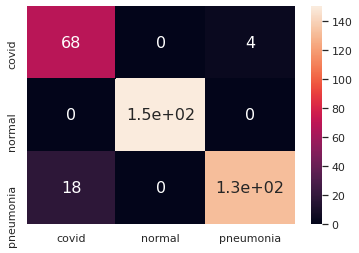

In [ ]:
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt

array = cm
df_cm = pd.DataFrame(array, index=["covid", "normal", "pneumonia"],
                     columns=["covid", "normal", "pneumonia"])
#df_cm = pd.DataFrame(array, range(3), range(3))
# plt.figure(figsize=(10,7))
sn.set(font_scale=1.0) # for label size
sn.heatmap(df_cm, annot=True, annot_kws={"size": 16}) # font size

plt.show()

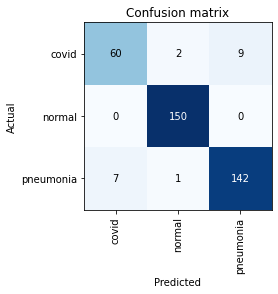

In [ ]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

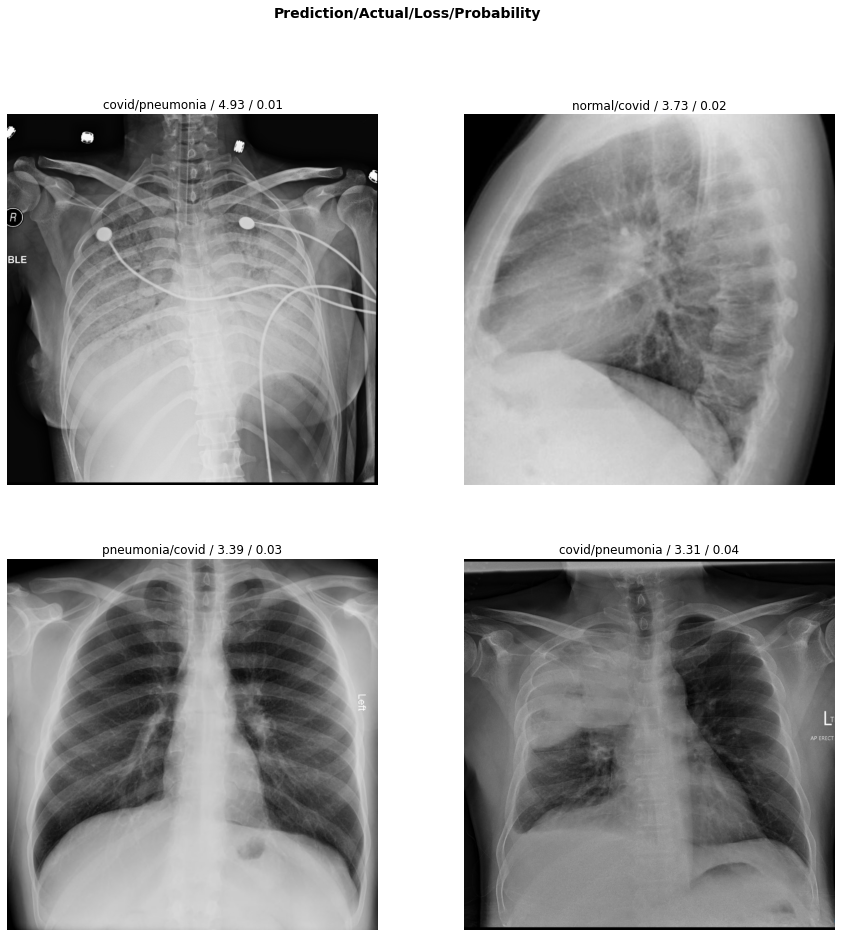

In [ ]:
interp.plot_top_losses(4, figsize=(15,15))


In [ ]:
log_preds,y = learn.TTA()
# probs = np.mean(np.exp(log_preds),0)

In [ ]:
tta_preds = np.argmax(np.exp(log_preds), axis = 1)

In [ ]:
log_preds.shape

torch.Size([371, 3])

In [ ]:
y

tensor([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

cm = confusion_matrix(y, tta_preds)
print(classification_report(y, tta_preds))

              precision    recall  f1-score   support

           0       0.87      0.86      0.87        71
           1       0.99      1.00      1.00       150
           2       0.94      0.94      0.94       150

    accuracy                           0.95       371
   macro avg       0.93      0.93      0.93       371
weighted avg       0.95      0.95      0.95       371



In [ ]:
cm

array([[ 61,   1,   9],
       [  0, 150,   0],
       [  9,   0, 141]])

In [ ]:
# preds = np.argmax(predictions, axis = 1)
# preds, len(preds)

In [ ]:
## DenseNet

In [ ]:
learn = cnn_learner(data, models.densenet121, metrics=error_rate)

learn.loss_fn = FocalLoss()

epoch,train_loss,valid_loss,error_rate,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


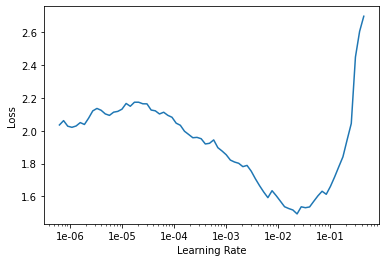

In [ ]:
learn.lr_find()
learn.recorder.plot()

In [ ]:
path_models = path_img + 'models/'

In [ ]:
learn.fit_one_cycle(4, max_lr = 3e-3)

epoch,train_loss,valid_loss,error_rate,time
0,0.761228,0.679635,0.137466,03:36
1,0.554391,0.273179,0.107817,02:34
2,0.342317,0.230520,0.086253,02:33
3,0.258579,0.233923,0.088949,02:32


In [ ]:
learn.save(path_models + 'epoch-4-1e-3-densenet121-focal')

In [ ]:
learn.fit_one_cycle(10, max_lr=slice(1e-4, 2e-3))

epoch,train_loss,valid_loss,error_rate,time
0,0.251191,0.261831,0.097035,02:34
1,0.252171,0.341116,0.099730,02:32
2,0.239054,0.284658,0.086253,02:34
3,0.257336,0.411681,0.110512,02:33
4,0.225039,0.228985,0.078167,02:32
5,0.243149,0.190663,0.061995,02:32
6,0.178234,0.225795,0.075472,02:34
7,0.135562,0.195490,0.061995,02:33
8,0.110637,0.189303,0.059299,02:33
9,0.113493,0.196253,0.059299,02:33


In [ ]:
learn.save(path_models + 'epoch-14-1e-3-densenet121-focal')

In [ ]:
learn.load(path_models + 'epoch-14-1e-3-densenet121-focal');

In [ ]:
learn.fit_one_cycle(6, max_lr=slice(1e-4, 1e-3))

epoch,train_loss,valid_loss,error_rate,time
0,0.123126,0.168269,0.053908,02:34
1,0.127412,0.249099,0.070081,02:34
2,0.139147,0.191613,0.059299,02:32
3,0.125260,0.189791,0.048518,02:33
4,0.111832,0.187281,0.056604,02:33
5,0.141219,0.203076,0.056604,02:35


In [ ]:
learn.save(path_models + 'epoch-20-8e-4-densenet121-focal')

In [ ]:
learn.fit_one_cycle(6, max_lr=slice(1e-4, 5e-4))

epoch,train_loss,valid_loss,error_rate,time
0,0.081782,0.203579,0.061995,02:34
1,0.097055,0.214495,0.064690,02:33
2,0.118066,0.201206,0.056604,02:32
3,0.111584,0.200742,0.064690,02:34
4,0.093108,0.190351,0.051213,02:34
5,0.082020,0.187488,0.048518,02:32


In [ ]:
learn.save(path_models + 'epoch-26-2e-2-densenet121-focal')

In [ ]:
#learn.load(path_models + 'epoch-20-2e-3-resnet34');

In [ ]:
predictions, y1 = learn.get_preds(DatasetType.Test)
preds = np.argmax(predictions, axis = 1)
preds, len(preds)

(tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 0, 0, 0, 0, 2, 0,
         1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
         1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1,
         1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1,
         1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
         1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
         1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
         1, 1, 1, 1, 1, 1, 0, 0, 0, 2, 0, 2, 2, 0, 0, 2, 0, 0, 2, 2, 1, 2, 2, 0,
         2, 0, 0, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
         2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
         2, 2, 2, 2, 2, 2, 2

In [ ]:
t1 = [0 for i in range(72)]
t2 = [1 for i in range(150)]
t3 = [2 for i in range(150)]
arr = t1+t2+t3
arr = np.asarray(arr)
len(arr)

372

In [ ]:
import torch
target = torch.from_numpy(arr)
target

tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,

In [ ]:
## 26 epochs densenet121
from sklearn.metrics import classification_report, confusion_matrix

cm = confusion_matrix(target, preds)
print(classification_report(target, preds))
cm

              precision    recall  f1-score   support

           0       0.83      0.93      0.88        72
           1       0.99      0.99      0.99       150
           2       0.95      0.90      0.92       150

    accuracy                           0.94       372
   macro avg       0.92      0.94      0.93       372
weighted avg       0.94      0.94      0.94       372



array([[ 67,   0,   5],
       [  0, 148,   2],
       [ 14,   1, 135]])

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

cm = confusion_matrix(target, preds)
print(classification_report(target, preds))

              precision    recall  f1-score   support

           0       0.83      0.93      0.88        72
           1       0.99      0.99      0.99       150
           2       0.95      0.90      0.92       150

    accuracy                           0.94       372
   macro avg       0.92      0.94      0.93       372
weighted avg       0.94      0.94      0.94       372



In [ ]:
cm ## 20 epochs densenet121

array([[ 67,   0,   5],
       [  0, 148,   2],
       [ 14,   1, 135]])

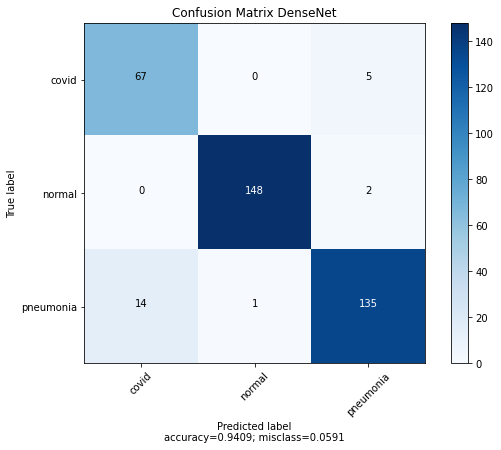

In [ ]:
import numpy as np
cm = np.array([[ 67,   0,   5],
       [  0, 148,   2],
       [ 14,   1, 135]])
import numpy as np


def plot_confusion_matrix(cm,
                          target_names,
                          title='Confusion matrix',
                          cmap=None,
                          normalize=True):
    """
    given a sklearn confusion matrix (cm), make a nice plot

    Arguments
    ---------
    cm:           confusion matrix from sklearn.metrics.confusion_matrix

    target_names: given classification classes such as [0, 1, 2]
                  the class names, for example: ['high', 'medium', 'low']

    title:        the text to display at the top of the matrix

    cmap:         the gradient of the values displayed from matplotlib.pyplot.cm
                  see http://matplotlib.org/examples/color/colormaps_reference.html
                  plt.get_cmap('jet') or plt.cm.Blues

    normalize:    If False, plot the raw numbers
                  If True, plot the proportions

    Usage
    -----
    plot_confusion_matrix(cm           = cm,                  # confusion matrix created by
                                                              # sklearn.metrics.confusion_matrix
                          normalize    = True,                # show proportions
                          target_names = y_labels_vals,       # list of names of the classes
                          title        = best_estimator_name) # title of graph

    Citiation
    ---------
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html

    """
    import matplotlib.pyplot as plt
    import numpy as np
    import itertools

    accuracy = np.trace(cm) / float(np.sum(cm))
    misclass = 1 - accuracy

    if cmap is None:
        cmap = plt.get_cmap('Blues')

    plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=45)
        plt.yticks(tick_marks, target_names)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(j, i, "{:0.4f}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
        else:
            plt.text(j, i, "{:,}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")


    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label\naccuracy={:0.4f}; misclass={:0.4f}'.format(accuracy, misclass))
    plt.show()




plot_confusion_matrix(cm = np.array([[ 67,   0,   5],
                                      [  0, 148,   2],
                                      [ 14,   1, 135]]), 
                      normalize    = False,
                      target_names = ["covid", "normal", "pneumonia"],
                      title        = "Confusion Matrix DenseNet")

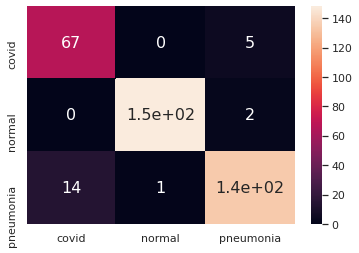

In [ ]:
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt

array = cm
df_cm = pd.DataFrame(array, index=["covid", "normal", "pneumonia"],
                     columns=["covid", "normal", "pneumonia"])
#df_cm = pd.DataFrame(array, range(3), range(3))
# plt.figure(figsize=(10,7))
sn.set(font_scale=1.0) # for label size
sn.heatmap(df_cm, annot=True, annot_kws={"size": 16}) # font size

plt.show()

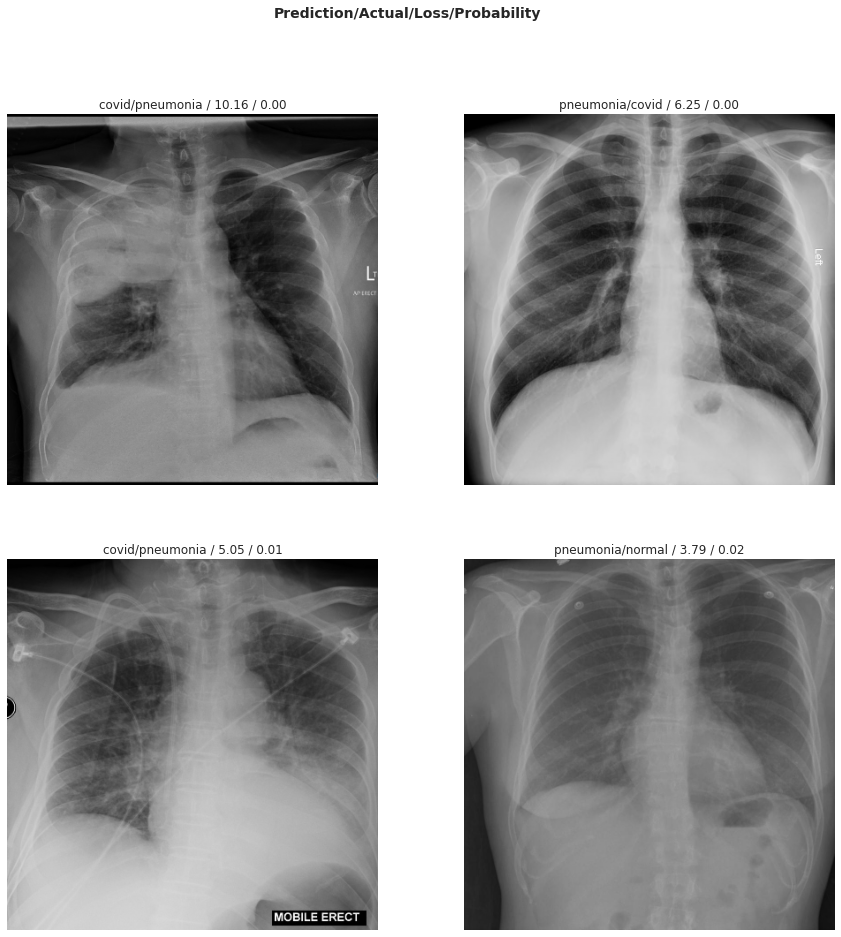

In [ ]:
interp = ClassificationInterpretation.from_learner(learn)
#interp.plot_confusion_matrix()

interp.plot_top_losses(4, figsize=(15,15))
